# Synthetics

Here we visualize the reward functions of the available synthetic environments.

We also provide statistics on the complexity and solvability of each synthetic environment.

### Setup

In [3]:
import coba as cb
from matplotlib import pyplot as plt
from itertools import product
from statistics import quantiles
from collections import Counter, defaultdict

def visualize_global_reward(envs):
    for env in envs:
        I = list(env.read())

        assert I[0]['context'] is None
        assert all(len(a) == 1 for a in I[0]['actions'])

        X = [a[0] for i in I for a in                  i['actions'] ]
        Y = [r    for i in I for r in map(i['rewards'],i['actions'])]

        plt.scatter(X,Y)
        plt.ylabel('Reward')
        plt.ylim(-.5,1.5)
        plt.xlabel('Action Feature')
        plt.show()

def visualize_action_rewards(envs):
    for env in envs:
        I = list(env.read())

        assert I[0]['context'] and len(I[0]['context']) == 1

        X  = [i['context'][0] for i in I]

        for i,Y in enumerate(zip(*[map(i['rewards'],i['actions']) for i in I])):
            plt.scatter(X,Y,label=i+1)

        plt.ylabel('Reward')
        plt.xlabel('Context Feature')
        plt.legend(bbox_to_anchor=[1, 1.02],loc='upper left',title='Action')
        plt.show()

def range_r(R):
    return (sum(map(max,R)) - sum(map(min,R)))/1000

def const_r(R):
    best_const = Counter([r.index(max(r)) for r in R]).most_common()[0][0]
    return (sum(map(max,R))-sum([r[best_const] for r in R]))/1000

def kldiv_i(R):
    import math
    diverge  = 0
    for v in Counter([r.index(max(r)) for r in R]).values():
        p = v/len(R)
        q = 1/len(R[0])
        diverge += p * math.log(p/q)
    return diverge

## Linear Synthetic

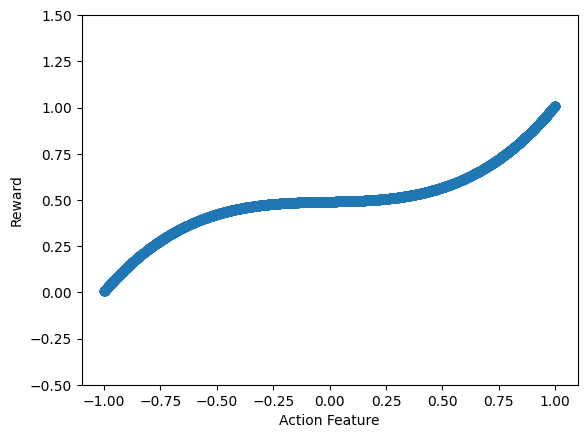

In [4]:
visualize_global_reward(cb.Environments.from_linear_synthetic(
    1000,
    n_actions=5,
    n_context_features=0,
    n_action_features=1,
    reward_features=['a','aa','aaa'], #third-order polynomials
    seed=None))

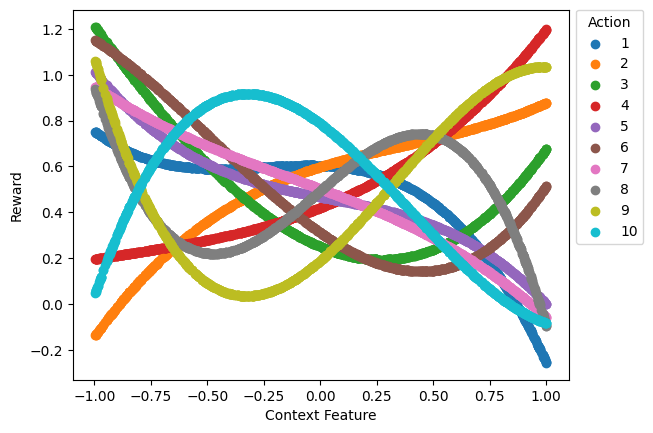

In [6]:
visualize_action_rewards(cb.Environments.from_linear_synthetic(
    1000, 
    n_actions=10, 
    n_context_features=1, 
    n_action_features=0,
    n_coefficients=3, 
    reward_features=['x','xx','xxx'], #third-order polynomials
    seed=None
))

In [6]:
consts = []
ranges = []
indexs = []

for env in cb.Environments.from_linear_synthetic(1000, n_actions=10, n_context_features=5, n_action_features=0, reward_features=['x','xx'], seed=range(100)):
    R = [i['rewards'] for i in env.read()]
    consts.append(const_r(R))
    ranges.append(range_r(R))
    indexs.append(kldiv_i(R))

print(str([f"{r:.3f}" for r in quantiles(consts,n=10)]) + " Potential advantage over best const") 
print(str([f"{r:.3f}" for r in quantiles(ranges,n=10)]) + " Potential advantage over best worst")
print(str([f"{r:.3f}" for r in quantiles(indexs,n=10)]) + " Similarity to all actions winning equally")

['0.252', '0.265', '0.273', '0.278', '0.289', '0.292', '0.299', '0.314', '0.330'] Potential advantage over best const
['0.562', '0.572', '0.585', '0.598', '0.606', '0.615', '0.620', '0.632', '0.657'] Potential advantage over best worst
['0.048', '0.056', '0.066', '0.074', '0.088', '0.097', '0.110', '0.127', '0.137'] Similarity to all actions winning equally


## Kernel Synthetic

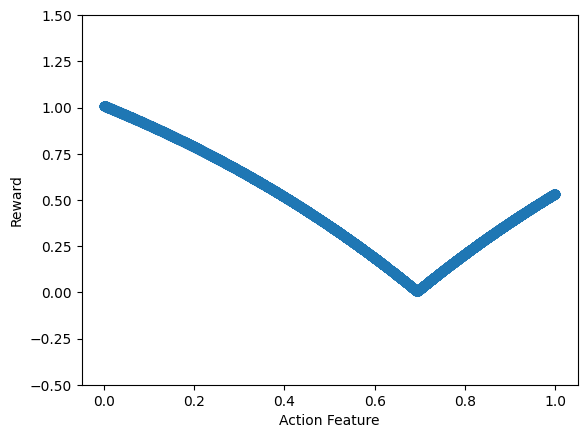

In [28]:
visualize_global_reward(cb.Environments.from_kernel_synthetic(1000, n_context_features=0, n_action_features=1, n_exemplars=1, kernel='exponential',seed=None))

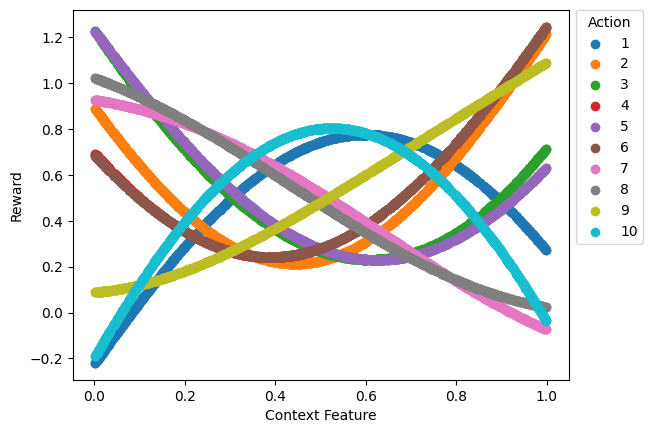

In [22]:
visualize_action_rewards(cb.Environments.from_kernel_synthetic(1000, n_context_features=1, n_action_features=0,seed=None,kernel='gaussian'))

In [29]:
consts = []
ranges = []
indexs = []

for env in cb.Environments.from_kernel_synthetic(1000, n_actions=10, n_context_features=5, n_action_features=0, seed=range(100)):
    R = [i['rewards'] for i in env.read()]
    consts.append(const_r(R))
    ranges.append(range_r(R))
    indexs.append(kldiv_i(R))

print(str([f"{r:.3f}" for r in quantiles(consts,n=10)]) + " Potential advantage over best const") 
print(str([f"{r:.3f}" for r in quantiles(ranges,n=10)]) + " Potential advantage over best worst")
print(str([f"{r:.3f}" for r in quantiles(indexs,n=10)]) + " Similarity to all actions winning equally")

['0.295', '0.311', '0.319', '0.326', '0.334', '0.341', '0.350', '0.353', '0.365'] Potential advantage over best const
['0.665', '0.673', '0.692', '0.698', '0.702', '0.708', '0.712', '0.721', '0.737'] Potential advantage over best worst
['0.035', '0.045', '0.050', '0.058', '0.065', '0.074', '0.086', '0.102', '0.121'] Similarity to all actions winning equally


## MLP Synthetic

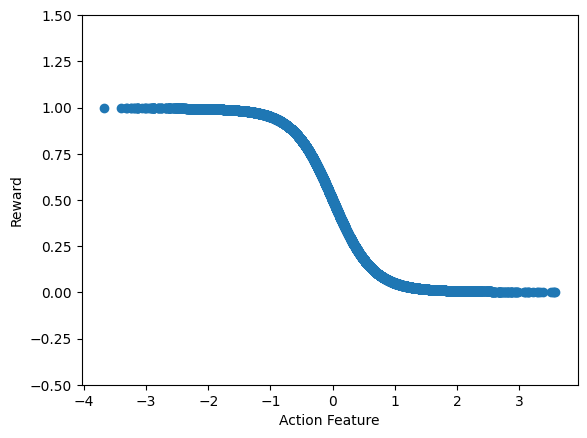

In [74]:
visualize_global_reward(cb.Environments.from_mlp_synthetic(1000, n_context_features=0, n_action_features=1,seed=None))

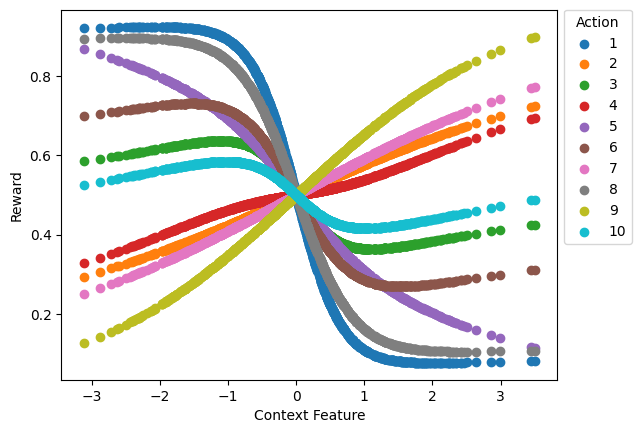

In [70]:
visualize_action_rewards(cb.Environments.from_mlp_synthetic(1000, n_context_features=1, n_action_features=0,seed=None))

In [39]:
consts = []
ranges = []
indexs = []

for env in cb.Environments.from_mlp_synthetic(1000, n_actions=10, n_context_features=10, n_action_features=0, seed=range(100)):
    R = [i['rewards'] for i in env.read()]
    consts.append(const_r(R))
    ranges.append(range_r(R))
    indexs.append(kldiv_i(R))

print(str([f"{r:.3f}" for r in quantiles(consts,n=10)]) + " Potential advantage over best const") 
print(str([f"{r:.3f}" for r in quantiles(ranges,n=10)]) + " Potential advantage over best worst")
print(str([f"{r:.3f}" for r in quantiles(indexs,n=10)]) + " Similarity to all actions winning equally")

['0.375', '0.386', '0.405', '0.411', '0.416', '0.422', '0.430', '0.438', '0.447'] Potential advantage over best const
['0.759', '0.787', '0.808', '0.820', '0.831', '0.845', '0.861', '0.869', '0.896'] Potential advantage over best worst
['0.180', '0.216', '0.245', '0.269', '0.292', '0.323', '0.359', '0.390', '0.427'] Similarity to all actions winning equally


## Neighbors Synthetic

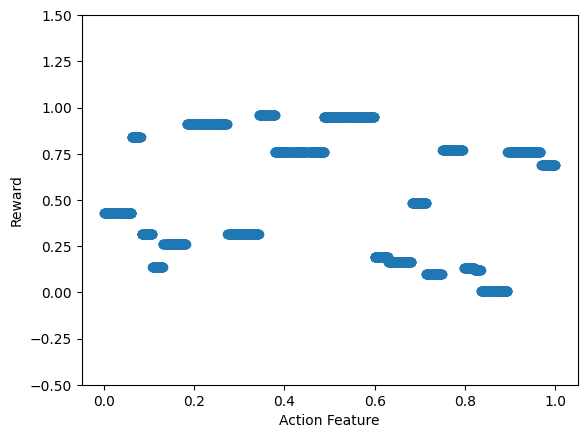

In [6]:
visualize_global_reward(cb.Environments.from_neighbors_synthetic(1000, n_context_features=0, n_action_features=1, n_neighborhoods=20, seed=None))

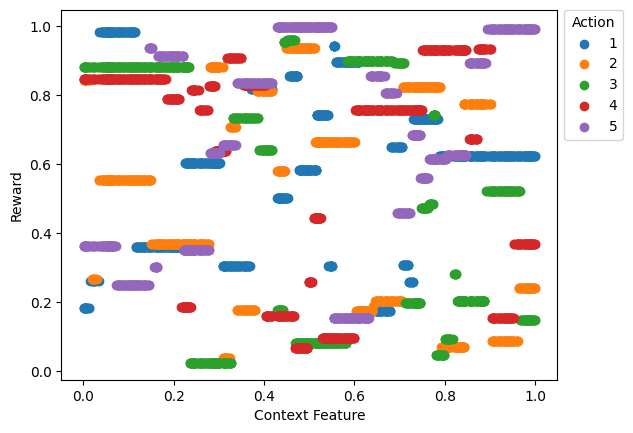

In [4]:
visualize_action_rewards(cb.Environments.from_neighbors_synthetic(1000, n_actions=5, n_context_features=1, n_action_features=0, n_neighborhoods=20, seed=None))

In [8]:
consts = []
ranges = []
indexs = []

for env in cb.Environments.from_neighbors_synthetic(1000, n_actions=5, n_context_features=10, n_action_features=0, n_neighborhoods=20, seed=range(100)):
    R = [i['rewards'] for i in env.read()]
    consts.append(const_r(R))
    ranges.append(range_r(R))
    indexs.append(kldiv_i(R))

print(str([f"{r:.3f}" for r in quantiles(consts,n=10)]) + " Potential advantage over best const") 
print(str([f"{r:.3f}" for r in quantiles(ranges,n=10)]) + " Potential advantage over best worst")
print(str([f"{r:.3f}" for r in quantiles(indexs,n=10)]) + " Similarity to all actions winning equally")

['0.200', '0.221', '0.239', '0.254', '0.263', '0.277', '0.287', '0.306', '0.329'] Potential advantage over best const
['0.619', '0.640', '0.648', '0.658', '0.667', '0.675', '0.680', '0.694', '0.714'] Potential advantage over best worst
['0.019', '0.026', '0.035', '0.053', '0.067', '0.077', '0.087', '0.113', '0.137'] Similarity to all actions winning equally
